In [154]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [155]:
import numpy as np
import pandas as pd

In [156]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [157]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [158]:
# Create an engine that can talk to the 'hawaii.sqlite' database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [159]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine=engine, reflect=True)

In [160]:
# Print all of the classes mapped to the Base.  A python class is essentially equivalent to an SQL table.
Base.classes.keys()

['measurement', 'station']

In [161]:
# Save references to each table; this will update the DB as changes are made on the SQL side
Measurement = Base.classes.measurement
Station = Base.classes.station

In [162]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Precipitation Analysis

In [163]:
# Use the Inspector to print the column names and types from the table titled 'measurement'
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [164]:
# Sneak peek of data table
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [165]:
# Curious to see how many dates records in this table
measurement_records_all = session.query(func.count(Measurement.date)).all()
measurement_records_all

[(19550)]

In [166]:
# Curious to see the earliest date
earliest_date = session.query(Measurement.date).order_by(Measurement.date).first()
earliest_date

('2010-01-01')

In [167]:
# Find latest date for this assignment
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [169]:
# Design a query to retrieve the last 12 months of precipitation data
last_12_months = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23')
last_12_months.count()

2223

In [209]:
# Load query results into a Pandas DataFrame, sort by date in descending order, and set index using date
msmt_df = pd.DataFrame(last_12_months[:], columns=['date', 'prcp'])
group_msmt_df = msmt_df.groupby(['date']).sum().sort_values("date", ascending=False)
group_msmt_df

prcp
date            
2017-08-23  0.53
2017-08-22  0.50
2017-08-21  0.58
2017-08-20  0.01
2017-08-19  0.09
...          ...
2016-08-28  3.10
2016-08-27  0.32
2016-08-26  0.10
2016-08-25  0.54
2016-08-24  9.33

[365 rows x 1 columns]

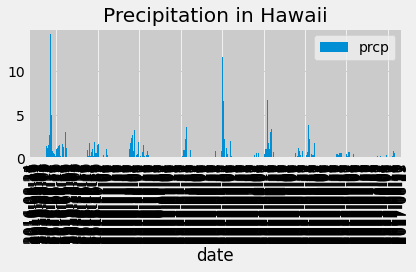

In [210]:
# Use Pandas Plotting with Matplotlib to plot the data

group_msmt_df.iloc[::-1].plot.bar(title="Precipitation in Hawaii")
plt.tight_layout()
plt.show()


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

# Station Analysis

In [63]:
# Use the Inspector to print the column names and types from the table titled 'station'
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [ ]:
df = pd.DataFrame(last_12_months[:], columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df.sort_values(['date'], ascending=False)
df.head(400)

In [146]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).count()

9

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?

# In order to answer the above, we will need to first convert the two tables to panda DF's in order to join them
measurement_df = (measurement_records_all[:], columns=['station', 'date', 'prcp', 'tobs'])



# List the stations and the counts in descending order.


In [ ]:
=

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
